In [4]:
import requests
from bs4 import BeautifulSoup
import datetime
import time
import re
import numpy as np
start = datetime.datetime.now()

url = 'http://www.footballdb.com/teams/nfl/philadelphia-eagles/stats/2016'
url_results = 'http://www.footballdb.com/teams/nfl/philadelphia-eagles/results/2016'

page = requests.get(url).content
soup = BeautifulSoup(page,'lxml')

In [121]:
soup

<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="unicode-escape"/>\n<meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n<meta content="initial-scale=1.0, width=device-width" name="viewport"/>\n<title>Philadelphia Eagles Statistics | The Football Database</title>\n<meta content="Philadelphia Eagles stats and statistics for the 2016 NFL season, including rushing, passing, receiving, kickoff returns, punt returns, punting, kicking and defense" name="description"/>\n<meta content="index,follow" name="robots"/>\n<meta content="FootballDB.com" property="og:site_name"/>\n<meta content="Philadelphia Eagles Statistics | The Football Database" property="og:title"/>\n<meta content="website" property="og:type"/>\n<meta content="Philadelphia Eagles stats and statistics for the 2016 NFL season, including rushing, passing, receiving, kickoff returns, punt returns, punting, kicking and defense" property="og:description"/>\n<meta content="http://www.footballdb.com/images/footballdb_200x200

In [92]:
import pandas as pd

def passing_stats(soup,year,teamname):

    table = soup.find('div', attrs={'id':'divToggle_P'}).table
    stat_type = 'Passing'
    
    Player = []
    Att = []
    Cmp = []
    Pct = []
    Yds = []
    YPA = []
    TD = []
    TD_pct = []
    Int = []
    Int_pct = []
    Lg = []
    Sack = []
    Loss = []
    Rate = []
    Season = []
    Type = []
    Team = []

    try:
        for row in table.find_all('tr')[1:-2]:
            # Create a variable of all the <td> tag pairs in each <tr> tag pair,
            col = row.find_all('td')
            # player
            Player.append( col[0].a.string.strip() )
            Att.append( col[1].string.strip() )
            Cmp.append( col[2].string.strip() )
            Pct.append( col[3].string.strip() )
            Yds.append( col[4].string.strip() )
            YPA.append( col[5].string.strip() )
            TD.append( col[6].string.strip() )
            TD_pct.append( col[7].string.strip() )
            Int.append( col[8].string.strip() )
            Int_pct.append( col[9].string.strip() )
            Lg.append( col[10].string.strip() )
            Sack.append( col[11].string.strip() )
            Loss.append( col[12].string.strip() )
            Rate.append( col[13].string.strip() )
            Season.append(year)
            Type.append(stat_type)
            Team.append(teamname)
            
        columns = {'Team':Team,'Player': Player, 'Att': Att, 'Cmp': Cmp, 
                   'Pct': Pct, 'Yds': Yds, 'YPA': YPA, 
                   'TD': TD, 'TD_pct': TD_pct, 'Int': Int, 
                   'Int_pct': Int_pct, 'Lg': Lg, 'Sack': Sack, 
                   'Loss': Loss, 'Rate': Rate, 'Season': Season}
        names = ['Team','Player', 'Att', 'Cmp','Pct', 'Yds', 'YPA', 
                   'TD', 'TD_pct', 'Int','Int_pct', 'Lg', 'Sack', 
                   'Loss', 'Rate', 'Season']
        # Create a dataframe from the columns variable
        return pd.DataFrame(columns,columns=names)
    except:
        for row in table.find_all('tr')[1:-1]:
            # Create a variable of all the <td> tag pairs in each <tr> tag pair,
            col = row.find_all('td')
            # player
            Player.append( col[0].a.string.strip() )
            Att.append( col[1].string.strip() )
            Cmp.append( col[2].string.strip() )
            Pct.append( col[3].string.strip() )
            Yds.append( col[4].string.strip() )
            YPA.append( col[5].string.strip() )
            TD.append( col[6].string.strip() )
            TD_pct.append( col[7].string.strip() )
            Int.append( col[8].string.strip() )
            Int_pct.append( col[9].string.strip() )
            Lg.append( col[10].string.strip() )
            Sack.append( col[11].string.strip() )
            Loss.append( col[12].string.strip() )
            Rate.append( col[13].string.strip() )
            Season.append(year)
            Type.append(stat_type)
            Team.append(teamname)
            
        columns = {'Team':Team,'Player': Player, 'Att': Att, 'Cmp': Cmp, 
                   'Pct': Pct, 'Yds': Yds, 'YPA': YPA, 
                   'TD': TD, 'TD_pct': TD_pct, 'Int': Int, 
                   'Int_pct': Int_pct, 'Lg': Lg, 'Sack': Sack, 
                   'Loss': Loss, 'Rate': Rate, 'Season': Season}
        names = ['Team','Player', 'Att', 'Cmp','Pct', 'Yds', 'YPA', 
                   'TD', 'TD_pct', 'Int','Int_pct', 'Lg', 'Sack', 
                   'Loss', 'Rate', 'Season']
        # Create a dataframe from the columns variable
        return pd.DataFrame(columns,columns=names)

In [93]:
import pandas as pd

def rushing_stats(soup,year,teamname):

    table = soup.find('div', attrs={'id':'divToggle_R'}).table
    stat_type = 'Rushing'
    
    Player = []
    Gms = []
    Att = []
    Yds = []
    Avg = []
    YPG = []
    Lg = []
    TD = []
    FD = []
    Team = []
    Season = []
    Type = []

    for row in table.find_all('tr')[1:-2]:
        # Create a variable of all the <td> tag pairs in each <tr> tag pair,
        col = row.find_all('td')
        # player
        Player.append( col[0].a.text.strip() )
        Gms.append( col[1].string.strip() )
        Att.append( col[2].string.strip() )
        Yds.append( col[3].string.strip() )
        Avg.append( col[4].string.strip() )
        YPG.append( col[5].string.strip() )
        Lg.append( col[6].string.strip() )
        TD.append( col[7].string.strip() )
        FD.append( col[8].string.strip() )
        Team.append(teamname)
        Season.append(year)
        Type.append(stat_type)

    columns = {'Team':Team,'Player': Player, 'Gms': Gms, 'Att': Att, 
               'Yds': Yds, 'Avg': Avg, 'YPG': YPG, 
               'Lg': Lg, 'TD': TD, 'FD': FD, 
               'Season': Season, 'Type': Type}
    names = ['Team','Player', 'Gms', 'Att','Yds', 'Avg', 'YPG', 
               'Lg', 'TD', 'FD', 'Season', 'Type']    

    # Create a dataframe from the columns variable
    return pd.DataFrame(columns,columns=names)

In [94]:
import pandas as pd

def receiving_stats(soup,year,teamname):

    table = soup.find('div', attrs={'id':'divToggle_C'}).table
    stat_type = 'Receiving'
    
    Player = []
    Gms = []
    Rec = []
    Yds = []
    Avg = []
    YPG = []
    Lg = []
    TD = []
    FD = []
    Tar = []
    YAC = []
    Team = []
    Season = []
    Type = []


    for row in table.find_all('tr')[1:-2]:
        # Create a variable of all the <td> tag pairs in each <tr> tag pair,
        col = row.find_all('td')
        # player
        Player.append( col[0].a.string.strip() )
        Gms.append( col[1].string.strip() )
        Rec.append( col[2].string.strip() )
        Yds.append( col[3].string.strip() )
        Avg.append( col[4].string.strip() )
        YPG.append( col[5].string.strip() )
        Lg.append( col[6].string.strip() )
        TD.append( col[7].string.strip() )
        FD.append( col[8].string.strip() )
        Tar.append( col[9].string.strip() )
        YAC.append( col[10].string.strip() )
        Team.append(teamname)
        Season.append(year)
        Type.append(stat_type)

    columns = {'Team':Team,'Player': Player, 'Gms': Gms, 'Rec': Rec, 
               'Yds': Yds, 'Avg': Avg, 'YPG': YPG, 
               'Lg': Lg, 'TD': TD, 'FD': FD, 
               'Tar': Tar, 'YAC': YAC,
               'Season': Season, 'Type': Type}
    names = ['Team','Player', 'Gms', 'Rec', 
               'Yds', 'Avg', 'YPG','Lg', 'TD', 'FD', 
               'Tar', 'YAC','Season', 'Type']

    # Create a dataframe from the columns variable
    return pd.DataFrame(columns,columns=names)

In [95]:
import pandas as pd

def scoring_stats(soup,year,teamname):

    table = soup.find('div', attrs={'id':'divToggle_S'}).table
    stat_type = 'Scoring'
    
    Player = []
    Tot = []
    R = []
    P = []
    KR = []
    PR = []
    IR = []
    FR = []
    BK = []
    BP = []
    FGR = []
    PAT = []
    FG = []
    Conv = []
    Saf = []
    Pts = []
    Team = []
    Season = []
    Type = []



    for row in table.find_all('tr')[2:-3]:
        # Create a variable of all the <td> tag pairs in each <tr> tag pair,
        col = row.find_all('td')
        # player
        Player.append( col[0].a.string.strip() )
        Tot.append( col[1].string.strip() )
        R.append( col[2].string.strip() )
        P.append( col[3].string.strip() )
        KR.append( col[4].string.strip() )
        PR.append( col[5].string.strip() )
        IR.append( col[6].string.strip() )
        FR.append( col[7].string.strip() )
        BK.append( col[8].string.strip() )
        BP.append( col[9].string.strip() )
        FGR.append( col[10].string.strip() )
        PAT.append( col[11].string.strip() )
        FG.append( col[12].string.strip() )
        Conv.append( col[13].string.strip() )
        Saf.append( col[14].string.strip() )
        Pts.append( col[15].string.strip() )
        Team.append(teamname)
        Season.append(year)
        Type.append(stat_type)

    columns = {'Team':Team,'Player': Player, 'Tot': Tot, 'R': R, 
               'P': P, 'KR': KR, 'PR': PR, 
               'IR': IR, 'FR': FR, 'BK': BK, 
               'BP': BP, 'FGR': FGR, 'PAT': PAT,
               'FG': FG, 'Conv': Conv, 'Saf': Saf, 'Pts': Pts,
               'Season': Season, 'Type': Type}
    names = ['Team','Player', 'Tot', 'R','P', 'KR', 'PR', 'IR', 'FR', 'BK', 'BP', 'FGR', 'PAT','FG', 'Conv', 'Saf', 'Pts','Season', 'Type']

    # Create a dataframe from the columns variable
    return pd.DataFrame(columns,columns=names)

### Defense

In [97]:
def defense_stats(soup,year,teamname):

    table = soup.find('div', attrs={'id':'divToggle_D'}).table
    stat_type = 'Defense'
    
    Player = []
    Int = []
    Yds = []
    Avg = []
    Lg = []
    TD = []
    Solo = []
    Ast = []
    Tot = []
    Sack = []
    YdsL = []
    Team = []
    Season = []
    Type = []


    for row in table.find_all('tr')[2:-3]:
        # Create a variable of all the <td> tag pairs in each <tr> tag pair,
        col = row.find_all('td')
        # player
        Player.append( col[0].a.string.strip() )
        Int.append( col[1].string.strip() )
        Yds.append( col[2].string.strip() )
        Avg.append( col[3].string.strip() )
        Lg.append( col[4].string.strip() )
        TD.append( col[4].string.strip() )
        try:
            Solo.append( col[5].string.strip() )
            Ast.append( col[6].string.strip() )
            Tot.append( col[7].string.strip() )
            Sack.append( col[8].string.strip() )
            YdsL.append( col[9].string.strip() )
            columns = {'Team':Team,'Player': Player, 'Int': Int, 'Yds': Yds, 'Avg': Avg, 'Lg': Lg, 
                       'TD': TD, 'Solo': Solo, 'Ast': Ast, 'Tot': Tot,'Sack': Sack, 'YdsL': YdsL,
                      'Season': Season, 'Type': Type}
            names = ['Team','Player', 'Int', 'Yds', 'Avg','Lg', 'TD', 'Solo', 
                       'Ast', 'Tot','Sack','YdsL','Season', 'Type']

        except:
            Sack.append( col[5].string.strip() )
            YdsL.append( col[6].string.strip() )
            columns = {'Team':Team,'Player': Player, 'Int': Int, 'Yds': Yds, 'Avg': Avg, 'Lg': Lg, 
               'TD': TD,'Sack': Sack, 'YdsL': YdsL,
              'Season': Season, 'Type': Type}
            names = ['Team','Player', 'Int', 'Yds', 'Avg','Lg', 'TD','Sack','YdsL','Season', 'Type']

        Season.append(year)
        Type.append(stat_type)
        Team.append(teamname)
#     columns = {'Player': Player, 'Int': Int, 'Yds': Yds, 'Avg': Avg, 'Lg': Lg, 
#                'TD': TD, 'Solo': Solo, 'Ast': Ast, 'Tot': Tot,'Sack': Sack, 'YdsL': YdsL,
#               'Season': Season, 'Type': Type}
#     names = ['Player', 'Int', 'Yds', 'Avg','Lg', 'TD', 'Solo', 
#                'Ast', 'Tot','Sack','YdsL','Season', 'Type']

    # Create a dataframe from the columns variable
    return pd.DataFrame(columns,columns=names)

In [98]:
def fumbles_stats(soup,year,teamname):
    
    table = soup.find('div', attrs={'id':'divToggle_M'}).table
    stat_type = 'Fumbles'

    Player = []
    Fum = []
    Lost = []
    Forced = []
    Own = []
    Opp = []
    Tot = []
    Yds = []
    TD = []
    Team = []
    Season = []
    Type = []
    try:
        for row in table.find_all('tr')[2:-2]:
            # Create a variable of all the <td> tag pairs in each <tr> tag pair,
            col = row.find_all('td')
            # player
            Player.append( col[0].a.string.strip() )
            Fum.append( col[1].string.strip() )
            Lost.append( col[2].string.strip() )
            Forced.append( col[3].string.strip() )
            Own.append( col[4].string.strip() )
            Opp.append( col[5].string.strip() )
            Tot.append( col[6].string.strip() )
            Yds.append( col[7].string.strip() )
            TD.append( col[8].string.strip() )
            Team.append(teamname)
            Season.append(year)
            Type.append(stat_type)
    except:
        pass
    
    columns = {'Team':Team,'Player': Player, 'Fum': Fum, 'Lost': Lost, 'Forced': Forced, 'Own': Own,
               'Opp': Opp, 'Tot': Tot, 'Yds': Yds, 'TD': TD, 'Season': Season, 'Type': Type}
    names = ['Team','Player', 'Fum', 'Lost', 'Forced','Own', 'Opp', 'Tot', 
           'Yds', 'TD','Season', 'Type']

    # Create a dataframe from the columns variable
    return pd.DataFrame(columns,columns=names)

        

### Special Teams

In [99]:
def kickoff_returns_stats(soup,year,teamname):

    table = soup.find('div', attrs={'id':'divToggle_KR'}).table
    stat_type = 'Kickoff Returns'

    Player = []
    Num = []
    Yds = []
    Avg = []
    FC = []
    Lg = []
    TD = []
    Team = []
    Season = []
    Type = []

    for row in table.find_all('tr')[1:-2]:
        # Create a variable of all the <td> tag pairs in each <tr> tag pair,
        col = row.find_all('td')
        # player
        Player.append( col[0].a.string.strip() )
        Num.append( col[1].string.strip() )
        Yds.append( col[2].string.strip() )
        Avg.append( col[3].string.strip() )
        FC.append( col[4].string.strip() )
        Lg.append( col[5].string.strip() )
        TD.append( col[6].string.strip() )
        Team.append(teamname)
        Season.append(year)
        Type.append(stat_type)

    columns = {'Team':Team,'Player': Player, 'Num': Num, 'Yds': Yds, 'Avg': Avg, 'FC': FC, 
               'Lg': Lg, 'TD': TD, 'Season': Season, 'Type': Type}
    names = ['Team','Player', 'Num', 'Yds', 'Avg','FC', 'Lg', 'TD','Season', 'Type']

    # Create a dataframe from the columns variable
    return pd.DataFrame(columns,columns=names)


In [100]:
def punt_returns_stats(soup,year,teamname):


    table = soup.find('div', attrs={'id':'divToggle_PR'}).table
    stat_type = 'Punt Returns'

    Player = []
    Num = []
    Yds = []
    Avg = []
    FC = []
    Lg = []
    TD = []
    Team = []
    Season = []
    Type = []

    for row in table.find_all('tr')[1:-2]:
        # Create a variable of all the <td> tag pairs in each <tr> tag pair,
        col = row.find_all('td')
        # player
        Player.append( col[0].a.string.strip() )
        Num.append( col[1].string.strip() )
        Yds.append( col[2].string.strip() )
        Avg.append( col[3].string.strip() )
        FC.append( col[4].string.strip() )
        Lg.append( col[5].string.strip() )
        TD.append( col[6].string.strip() )
        Team.append(teamname)
        Season.append(year)
        Type.append(stat_type)


    columns = {'Team':Team,'Player': Player, 'Num': Num, 'Yds': Yds, 'Avg': Avg, 'FC': FC, 
               'Lg': Lg, 'TD': TD, 'Season': Season, 'Type': Type}
    names = ['Team':Team,'Player', 'Num', 'Yds', 'Avg','FC', 'Lg', 'TD','Season', 'Type']



    # Create a dataframe from the columns variable
    return pd.DataFrame(columns,columns=names)


SyntaxError: invalid syntax (<ipython-input-100-b013e6245efd>, line 36)

In [101]:
def punting_stats(soup,year,teamname):

    table = soup.find('div', attrs={'id':'divToggle_U'}).table
    stat_type = 'Punting'

    Player = []
    Punts = []
    Yds = []
    Avg = []
    Lg = []
    TB = []
    In20 = []
    OB = []
    FC = []
    Dwn = []
    Blk = []
    Net = []
    Ret = []
    RYds = []
    TD = []
    Team = []
    Season = []
    Type = []


    for row in table.find_all('tr')[2:-2]:

            # Create a variable of all the <td> tag pairs in each <tr> tag pair,
        col = row.find_all('td')
        # player
        Player.append( col[0].a.string.strip() )
        Punts.append( col[1].string.strip() )
        Yds.append( col[2].string.strip() )
        Avg.append( col[3].string.strip() )
        Lg.append( col[4].string.strip() )
        TB.append( col[5].string.strip() )
        In20.append( col[6].string.strip() )
        try:
            Ret.append( col[12].string.strip() )
            RYds.append( col[13].string.strip() )
            TD.append( col[14].string.strip() )
            Net.append( col[11].string.strip() )
            OB.append( col[7].string.strip() )
            FC.append( col[8].string.strip() )
            Dwn.append( col[9].string.strip() )
            Blk.append( col[10].string.strip() )
            columns = {'Team':Team,'Player': Player, 'Punts': Punts, 'Yds': Yds, 'Avg': Avg, 'Lg': Lg, 'TB': TB, 
           'In20': In20, 'OB': OB, 'FC': FC, 'Dwn': Dwn, 'Blk': Blk, 'Net': Net, 'Ret': Ret,
           'RYds': RYds, 'TD': TD, 'Season': Season, 'Type': Type}
            names = ['Team','Player', 'Punts', 'Yds', 'Avg', 'Lg', 'TB','In20','OB','FC','Dwn','Blk','Net','Ret','RYds','TD','Season', 'Type']

        except:
            try:
                Blk.append( col[7].string.strip() )
                Net.append( col[8].string.strip() )
                Ret.append( col[9].string.strip() )
                RYds.append( col[10].string.strip() )
                TD.append( col[10].string.strip() )
                columns = {'Team':Team,'Player': Player, 'Punts': Punts, 'Yds': Yds, 'Avg': Avg, 'Lg': Lg, 'TB': TB, 
                   'In20': In20,'Blk': Blk, 'Net': Net, 'Ret': Ret,
                   'RYds': RYds, 'TD': TD, 'Season': Season, 'Type': Type}
                names = ['Team','Player', 'Punts', 'Yds', 'Avg', 'Lg', 'TB','In20','Blk','Net','Ret','RYds','TD','Season', 'Type']
            except:
                columns = {'Team':Team,'Player': Player, 'Punts': Punts, 'Yds': Yds, 'Avg': Avg, 'Lg': Lg, 'TB': TB, 
                   'In20': In20, 'Season': Season, 'Type': Type}
                names = ['Team','Player', 'Punts', 'Yds', 'Avg', 'Lg', 'TB','In20','Season', 'Type']

        Season.append(year)
        Type.append(stat_type)
        Team.append(teamname)

 
        # Create a dataframe from the columns variable
        return pd.DataFrame(columns,columns=names)

In [102]:
def kicking_stats(soup,year,teamname):

    table = soup.find('div', attrs={'id':'divToggle_K'}).table
    stat_type = 'Kicking'
    
    Player = []
    PAT = []
    FG = []
    _0_19 = []
    _20_29 = []
    _30_39 = []
    _40_49 = []
    _50plus = []
    Lg = []
    Pts = []
    Team = []
    Season = []
    Type = []


    for row in table.find_all('tr')[1:-2]:
        # Create a variable of all the <td> tag pairs in each <tr> tag pair,
        col = row.find_all('td')
        # player
        Player.append( col[0].a.string.strip() )
        PAT.append( col[1].string.strip() )
        FG.append( col[2].string.strip() )
        _0_19.append( col[3].string.strip() )
        _20_29.append( col[4].string.strip() )
        _30_39.append( col[5].string.strip() )
        _40_49.append( col[6].string.strip() )
        _50plus.append( col[7].string.strip() )
        Lg.append( col[8].string.strip() )
        Pts.append( col[9].string.strip() )
        Team.append(teamname)
        Season.append(year)
        Type.append(stat_type)

    columns = {'Team':Team,'Player': Player, 'PAT': PAT, 'FG': FG, '_0_19': _0_19, '_20_29': _20_29, 
               '_30_39': _30_39, '_40_49': _40_49, '_50plus':_50plus,'Lg':Lg, 'Pts':Pts, 'Season': Season, 'Type': Type}
    names = ['Team','Player', 'PAT', 'FG', '_0_19','_20_29','_30_39','_40_49','_50plus', 'Lg', 'Pts','Season', 'Type']

    # Create a dataframe from the columns variable
    return pd.DataFrame(columns,columns=names)


In [103]:
def kickoffs_stats(soup,year,teamname):

    table = soup.find('div', attrs={'id':'divToggle_O'}).table
    stat_type = 'Kickoffs'

    Player = []
    Num = []
    Yds = []
    Avg = []
    Lg = []
    TB = []
    OB = []
    Ret = []
    RYds = []
    TD = []
    OSK = []
    OSR = []
    Team = []
    Season = []
    Type = []

    try:
        for row in table.find_all('tr')[2:-2]:
            # Create a variable of all the <td> tag pairs in each <tr> tag pair,
            col = row.find_all('td')
            # player
            Player.append( col[0].a.string.strip() )
            Num.append( col[1].string.strip() )
            Yds.append( col[2].string.strip() )
            Avg.append( col[3].string.strip() )
            Lg.append( col[4].string.strip() )
            TB.append( col[5].string.strip() )
            OB.append( col[6].string.strip() )
            Ret.append( col[7].string.strip() )
            RYds.append( col[8].string.strip() )
            TD.append( col[9].string.strip() )
            OSK.append( col[10].string.strip() )
            OSR.append( col[11].string.strip() )
            Team.append(teamname)
            Season.append(year)
            Type.append(stat_type)
    except:
        pass
    columns = {'Team':Team,'Player': Player, 'Num': Num, 'Yds': Yds, 'Avg': Avg, 'Lg': Lg, 
               'TB': TB, 'OB': OB, 'Ret': Ret,'RYds': RYds, 'TD': TD, 
               'OSK': OSK, 'OSR': OSR, 'Season': Season, 'Type': Type}
    names = ['Team','Player', 'Num', 'Yds', 'Avg','Lg','TB','OB','Ret', 'RYds', 'TD','OSK','OSR','Season', 'Type']

        # Create a dataframe from the columns variable
    return pd.DataFrame(columns,columns=names)
        

### Results

In [14]:
url_results = 'http://www.footballdb.com/teams/nfl/philadelphia-eagles/results/2016'
page = requests.get(url_results).content
soup_results = BeautifulSoup(page,'lxml')

In [104]:
def season_results(soup,year,teamname):
    
    table = soup.table
    
    Date = []
    Opponent = []
    Location = []
    Result = []
    Score = []
    OT = []
    Attend = []
    Team = []
    Season = []

    for row in table.find_all('tr')[1:]:
        # Create a variable of all the <td> tag pairs in each <tr> tag pair,
        col = row.find_all('td')
        Date.append( col[0].span.string.strip() )
        Opponent.append( col[1].a.string.strip() )
        Location.append( col[2].string.strip() )
        Result.append( col[3].text.strip().split()[0] )
        Score.append( col[3].text.strip().split()[1] )
        ot = ''
        try:
            if col[3].text.strip().split()[2]=='OT':
                ot = 'Y'
        except:
            pass
        OT.append(ot)        
        Attend.append( col[4].string.strip() )
        Season.append( year )
        Team.append(teamname)
        
    columns = {'Team':Team,'Date': Date, 'Opponent': Opponent, 'Location': Location, 'Result': Result, 'Score':Score,'Attend': Attend, 'Season': Season}
    names = ['Team','Date', 'Opponent', 'Location', 'Result','Score','Attend','Season']

    # Create a dataframe from the columns variable
    return pd.DataFrame(columns,columns=names)

In [16]:
url = 'http://www.footballdb.com/teams/nfl/philadelphia-eagles/roster/2016'
page = requests.get(url).content
soup = BeautifulSoup(page,'lxml')

In [105]:
def season_roster(soup,year,teamname):
    try:
        table = soup.table

        Number = []
        Player = []
        Pos = []
        Birthday = []
        College = []
        Team = []
        Season = []

        for row in table.find_all('tr')[1:]:
            # Create a variable of all the <td> tag pairs in each <tr> tag pair,
            col = row.find_all('td')
            Number.append( col[0].string.strip() )
            Player.append( col[1].string.strip() )
            Pos.append( col[2].string.strip() )
            Birthday.append( col[3].string.strip() )
            College.append( col[4].string.strip() )
            Season.append( year )
            Team.append(teamname)

        columns = {'Team':Team,'Number': Number, 'Player': Player, 'Pos': Pos, 'College': College,'Season': Season}
        names = ['Team','Number', 'Player','Pos','College','Season']

        # Create a dataframe from the columns variable
        return pd.DataFrame(columns,columns=names)    
    except:
        pass

## Create Base Tables

In [2]:
years = list(range(2001,2017))

# 'http://www.footballdb.com/teams/nfl/philadelphia-eagles/stats/'+ year


In [165]:
year=2000
url = 'http://www.footballdb.com/teams/nfl/philadelphia-eagles/stats/'+str(year)
page = requests.get(url).content
soup = BeautifulSoup(page,'lxml')
teamname='Philadelphia Eagles'

In [147]:
soup

<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="unicode-escape"/>\n<meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n<meta content="initial-scale=1.0, width=device-width" name="viewport"/>\n<title>2000 Philadelphia Eagles Stats | The Football Database</title>\n<meta content="Philadelphia Eagles stats and statistics for the 2000 NFL season, including rushing, passing, receiving, kickoff returns, punt returns, punting, kicking and defense" name="description"/>\n<meta content="index,follow" name="robots"/>\n<meta content="FootballDB.com" property="og:site_name"/>\n<meta content="2000 Philadelphia Eagles Stats | The Football Database" property="og:title"/>\n<meta content="website" property="og:type"/>\n<meta content="Philadelphia Eagles stats and statistics for the 2000 NFL season, including rushing, passing, receiving, kickoff returns, punt returns, punting, kicking and defense" property="og:description"/>\n<meta content="http://www.footballdb.com/images/footballdb_200x200

In [148]:
passing = passing_stats(soup,str(year),teamname)
rushing = rushing_stats(soup,str(year),teamname)
receiving = receiving_stats(soup,str(year),teamname)
scoring = scoring_stats(soup,str(year),teamname)

In [149]:
defense = defense_stats(soup,str(year),teamname)
fumbles = fumbles_stats(soup,str(year),teamname)

In [150]:
ko_returns = kickoff_returns_stats(soup,str(year),teamname)
punt_returns = punt_returns_stats(soup,str(year),teamname)
punting = punting_stats(soup,str(year),teamname)
kicking = kicking_stats(soup,str(year),teamname)
kickoffs = kickoffs_stats(soup,str(year),teamname)

In [153]:
url = 'http://www.footballdb.com/teams/nfl/philadelphia-eagles/results/'+str(year)
page = requests.get(url).content
soup = BeautifulSoup(page,'lxml')

In [155]:
results = season_results(soup,str(year),teamname)

In [171]:
url = 'http://www.footballdb.com/teams/nfl/philadelphia-eagles/roster/'+str(year)
page = requests.get(url).content
soup = BeautifulSoup(page,'lxml')

In [172]:
roster = season_roster(soup,str(year),teamname)

In [189]:
import time
def get_years(team,years,passing=passing,rushing=rushing,receiving=receiving,scoring=scoring,defense=defense,fumbles=fumbles,ko_returns=ko_returns,punt_returns=punt_returns,punting=punting,kicking=kicking,kickoffs=kickoffs,results=results,roster=roster):
    team_name = team.replace('-',' ').title()
    
    for year in years:
        print year

        url = 'http://www.footballdb.com/teams/nfl/'+team+'/stats/'+str(year)
        page = requests.get(url).content
        time.sleep(30)
        soup = BeautifulSoup(page,'lxml')
        time.sleep(30)
        try:
            passing = passing.append(passing_stats(soup,str(year)),teamname)
            rushing = rushing.append(rushing_stats(soup,str(year)),teamname)
            receiving = receiving.append(receiving_stats(soup,str(year)),teamname)
            scoring = scoring.append(scoring_stats(soup,str(year)),teamname)
            defense = defense.append(defense_stats(soup,str(year)),teamname)
        except:
            pass
        try:
            fumbles = fumbles.append(fumbles_stats(soup,str(year)),teamname)
        except:
            pass
        try:
            ko_returns = ko_returns.append(kickoff_returns_stats(soup,str(year)),teamname)
        except:
            pass
        try:
            punt_returns = punt_returns.append(punt_returns_stats(soup,str(year)),teamname)
        except:
            pass
        try:
            punting = punting.append(punting_stats(soup,str(year)),teamname)
        except:
            pass
        try:
            kicking = kicking.append(kicking_stats(soup,str(year)),teamname)
        except:
            pass
        try:
            kickoffs = kickoffs.append(kickoffs_stats(soup,str(year)),teamname)
        except:
            pass

        url = 'http://www.footballdb.com/teams/nfl/'+team+'/results/'+str(year)
        page = requests.get(url).content
        time.sleep(30)
        soup = BeautifulSoup(page,'lxml')
        time.sleep(30)
        results = results.append(season_results(soup,str(year),teamname))


        url = 'http://www.footballdb.com/teams/nfl/' +team+ '/roster/'+str(year)
        page = requests.get(url).content
        time.sleep(30)
        soup = BeautifulSoup(page,'lxml')
        time.sleep(30)
        roster = roster.append(season_roster(soup,str(year),teamname))

In [194]:
get_years('philadelphia-eagles',list(range(2005,2017)))

2005


AttributeError: 'NoneType' object has no attribute 'find_all'

In [71]:
get_years('new-england-patriots',list(range(2000,2017)))

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


AttributeError: 'NoneType' object has no attribute 'find_all'

In [75]:
roster

,Number,Player,Pos,College,Season
0,2,David Akers,K,0,2000
1,24,Darnell Autry,RB,7,2000
2,88,Mike Bartrum,TE,0,2000
3,32,Jason Bostic,DB,0,2000
4,84,Luther Broughton,TE,1,2000
5,85,Na Brown,WR,2,2000
6,74,Doug Brzezinski,OG,0,2000
7,56,Mike Caldwell,LB,3,2000
8,25,Je'Rod Cherry,DB,0,2000
9,42,Rashard Cook,DB,0,2000


In [140]:
roster[['Team'Pos]].value_counts()

DB    750
LB    640
RB    521
WR    427
DE    376
OG    361
DT    329
OT    307
QB    237
TE    226
C     169
K      97
P      74
OE     46
DL      3
OL      1
LS      1
Name: Pos, dtype: int64

In [164]:
roster['Pos'][roster.Pos=='LS'] = 'C'

roster['Fense'] = ['O' if x in ['QB','RB','FB','LT','LG','C','RG','RT','TE','WR','OG','OE','OL','OT'] else
                   'D' if x in ('DB','DE','DT','LB','CB','S','SS','FS','DL') else 
                   'S' if x in ('K','P','KR','PR') else
                   '' for x in roster.Pos]

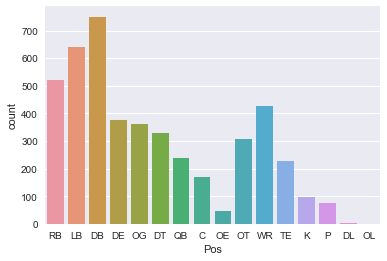

In [160]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

sns.countplot(x='Pos',data=roster)

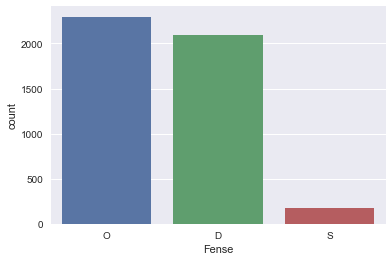

In [167]:
sns.countplot(x='Fense',data=roster)

In [166]:
roster.Pos[roster.Fense==''].value_counts()

Series([], Name: Pos, dtype: int64)

In [168]:
roster.head()

,Number,Player,Pos,College,Season,Fense
0,--,Billy Ray Barnes,RB,--,1960,O
1,--,Maxie Baughan,LB,--,1960,D
2,--,Chuck Bednarik,LB,--,1960,D
3,--,Tom Brookshier,DB,--,1960,D
4,--,Timmy Brown,RB,--,1960,O


In [174]:
fense_time = roster[['Fense','Season']]
fense_time['Count'] = 1

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Count
Fense Season       
D     1960       20
      1961       60
      1962       54
      1963       51
      1964       54
      1965       60
      1966       51
      1967       63
      1968       66
      1969       69
      1970       75
      1971       66
      1972       78
      1973       69
      1974       66
      1975       66
      1976       21
      1977       21
      1978       23
      1979       24
      1980       21
      1981       22
      1982       23
      1983       24
      1984       24
      1985       28
      1986       25
      1987       54
      1988       24
      1989       26
...             ...
S     1987        4
      1988        4
      1989        6
      1990        2
      1991        2
      1992        2
      1993        3
      1994        4
      1995        2
      1996        2
      1997        3
      1998        2
      1999        3
      2000        2
      2001        2
      2002        4
      2003        2
      2004        2
      2005        7
      2006        2
      2007        2
      2008        2
      2009        2
      2010        2
      2011        2
      2012        3
      2013        2
      2014        2
      2015        3
      2016        2

[168 rows x 1 columns]

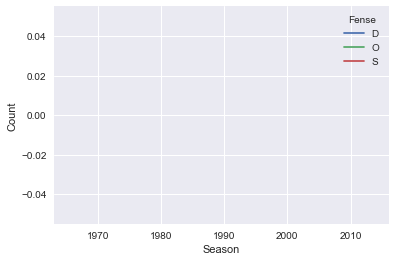

In [188]:
# fense_time = fense_time[['Fense','Season','Count']].groupby(['Fense','Season']).count()
fense_time.reset_index(inplace=True)
sns.tsplot(time='Season',value='Count',condition='Fense',data=fense_time)

In [189]:
fense_time.head()

,level_0,index,Fense,Season,Count
0,0,0,D,1960,20
1,1,1,D,1961,60
2,2,2,D,1962,54
3,3,3,D,1963,51
4,4,4,D,1964,54
